<a href="https://colab.research.google.com/github/JachuPro23/automation_robotics_lab/blob/master/Lab_auto_2_Ko%C5%82odziejczyk_Szl%C4%99k_Rumas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### REPORT LAB 2
### Kacper Kołodziejczyk 250185
### Jan Szlęk 250195
### Sewer Rumas 250191

**Lab 2: Advanced Linear Programming and Sensitivity Analysis**
- Defining more complex linear programming tasks
- Learning different constraint types
- Sensitivity analysis

**Production Optimization Problem**

This program solves a linear programming problem for optimizing production of three products (A, B, and C).

The A can be for example a number of beds, B can be meters of plywood and C can be meters of low quality plywood.
Notice that it does not make sense to produce a half of a bed, so we need to use integer variables for this decision variable.

**Decision Variables:**
- unitsA: Number of units of product A to produce (integer):
- unitsB: Number of units of product B to produce
- unitsC: Number of units of product C to produce

**Objective Function:**
- Maximize profit: 400 PLN per unit A + 300 PLN per unit B + 200 PLN per unit C

**Constraints:**
- Assembly time: 0.3h per A + 0.1h per B + 0.1h per C ≤ 1800 hours
- Quality control: 0.1h per A + 0.08h per B + 0.04h per C ≤ 800 hours
- Packaging: 0.06h per A + 0.04h per B + 0.05h per C ≤ 700 hours


In [6]:
# In Google Colab, ensure PuLP is installed:
!pip install pulp
from pulp import (
    LpProblem,
    LpVariable,
    LpMaximize,
    LpInteger,
    LpContinuous,
    LpBinary,
    value,
    PULP_CBC_CMD
)


# 1) Create the optimization problem (maximize profit).
prob = LpProblem("Advanced_Production_Problem", LpMaximize)

# 2) Define Decision Variables
# Let's say:
#   - A (number of units of product A) is integer (like beds).
#   - B (number of units of product B) is continuous or integer, depending on your scenario.
#   - C (number of units of product C) is continuous or integer, too.

A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
B = LpVariable("B", lowBound=0)  # continous meters of plywood
C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

# 3) Define Objective Function
# Profit values (you can tweak these):
profit_A = 400
profit_B = 300
profit_C = 200

prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

# 4) Define Constraints

# --- Resource / Time Constraints (same as the previous example, extended if desired) ---
# Example: max available hours in Assembly, Quality Control, and Packaging
prob += 0.3*A + 0.1*B + 0.1*C <= 1800, "Assembly_Hours"
prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

# --- Minimum Demand Constraints ---
# Suppose the company must produce at least 100 units of A, 50 of B, and 80 of C to satisfy orders.
prob += A >= 100, "Min_Demand_A"
prob += B >= 50,  "Min_Demand_B"
prob += C >= 80,  "Min_Demand_C"

# --- Optional Additional Constraints ---
# For instance, if product C requires a special component that is limited:
# Let's say we have only 500 units of that component, and each unit of C consumes 1 unit of that component
# prob += C <= 500, "Special_Component_Limit"

# Alternatively, we might have a ratio constraint, e.g., for product mix synergy:
# For example, we do not want to produce more B than 2 times A
# prob += B <= 2 * A, "Mix_Ratio_Constraint"

# 5) Solve the problem
prob.writeLP("AdvancedProduction.lp")
prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

# 6) Print results
print("Status:", prob.status)
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Total profit = ", value(prob.objective))

FileNotFoundError: [Errno 2] No such file or directory: 'your_notebook.ipynb'

## 2. Interpreting the Extended Model



### Minimum Demand Constraints:
- E.g. `A >= 100` ensures at least 100 units of A are produced.

### Optional Constraints:
- Resource constraints, ratio constraints, or any other real-world limitations.



## 3. Performing Sensitivity Analysis

### Approach A: Manual Parameter Variation
- **Change the availability of resources:**
  - For example, reduce the 1800 hours of Assembly to 1500, solve again, and observe the new optimal solution.
- **Change the profit coefficients:**
  - If the profit for product C increases to 250, does the solution shift toward more C?
- **Change the minimum demand:**
  - If the market demands 150 units of A instead of 100, how does that affect the objective?

## Exercise 1: Minimum Demand and New Constraints

- Implement the code above and check if it finds a feasible solution.
- Alter the minimum demands:
  - Increase or decrease them to see if the solution changes drastically.
- Interpret which constraints become "binding" (fully used, the value of the constraint is equal to its limit) in the optimal solution.

In [3]:
# In Google Colab, ensure PuLP is installed:
!pip install pulp

from pulp import (
    LpProblem,
    LpVariable,
    LpMaximize,
    LpInteger,
    LpContinuous,
    LpBinary,
    value,
    PULP_CBC_CMD
)

# 1) Create the optimization problem (maximize profit).
prob = LpProblem("Advanced_Production_Problem", LpMaximize)

# 2) Define Decision Variables
# Let's say:
#   - A (number of units of product A) is integer (like beds).
#   - B (number of units of product B) is continuous or integer, depending on your scenario.
#   - C (number of units of product C) is continuous or integer, too.

A = LpVariable("A", lowBound=0, cat=LpInteger)  # must be integer
B = LpVariable("B", lowBound=0)  # continous meters of plywood
C = LpVariable("C", lowBound=0)  # continous meters of low quality plywood

# 3) Define Objective Function
# Profit values (you can tweak these):
profit_A = 500
profit_B = 400
profit_C = 300

prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

# 4) Define Constraints

# --- Resource / Time Constraints (same as the previous example, extended if desired) ---
# Example: max available hours in Assembly, Quality Control, and Packaging
prob += 0.3*A + 0.1*B + 0.1*C <= 1800, "Assembly_Hours"
prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

# --- Minimum Demand Constraints ---
# Suppose the company must produce at least 100 units of A, 50 of B, and 80 of C to satisfy orders.
prob += A >= 150, "Min_Demand_A"
prob += B >= 100, "Min_Demand_B"
prob += C >= 120, "Min_Demand_C"

# --- Optional Additional Constraints ---
# For instance, if product C requires a special component that is limited:
# Let's say we have only 500 units of that component, and each unit of C consumes 1 unit of that component
# prob += C <= 500, "Special_Component_Limit"

# Alternatively, we might have a ratio constraint, e.g., for product mix synergy:
# For example, we do not want to produce more B than 2 times A
# prob += B <= 2 * A, "Mix_Ratio_Constraint"

# 5) Solve the problem
prob.writeLP("AdvancedProduction.lp")
prob.solve(PULP_CBC_CMD(msg=False))  # CBC solver

# 6) Print results
print("Status:", prob.status)
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Total profit = ", value(prob.objective))

for name, constraint in prob.constraints.items():
    if constraint.slack is not None and abs(constraint.slack) < 1e-5:  # Check if slack is not None before using abs()
        print(f"Binding: {name}")

#A is binding, because by changing its demand changes the profit of other products. B,C are not, because changing their demand does not change profit of other products.


Status: 1
A = 150.0
B = 4837.5
C = 9950.0
Total profit =  4995000.0
Binding: Quality_Control_Hours
Binding: Packaging_Hours
Binding: Min_Demand_A


### EXPLANATION

- `!pip install pulp` ensures the **PuLP** library is installed in your Colab environment.
- `LpProblem("Advanced_Production_Problem", LpMaximize)` creates a linear optimization problem that aims to **maximize total profit**.
- Decision variables `A`, `B`, and `C` represent the production quantities of different products:
  - `A` must be an integer (e.g. beds).
  - `B` and `C` are continuous (e.g. meters of materials).
- The **objective function** maximizes profit: `500*A + 400*B + 300*C`.
- Three **time-based constraints** are added to reflect limited availability of:
  - **Assembly hours**
  - **Quality control hours**
  - **Packaging hours**
- **Minimum demand constraints** ensure the company produces at least:
  - 150 units of Product A
  - 100 units of Product B
  - 120 units of Product C
  - which is a change to an example, where the minimum demands were different (100, 50, 80)
- Additional (optional) constraints are shown but commented out:
  - Limit on special components for product C
  - A ratio limit between production of B and A
- `prob.solve()` uses the CBC solver to find the optimal production plan.
- The results include:
  - **Status** (e.g. Optimal)
  - **Quantity of each product to produce**
  - **Maximum profit achieved**
- The script also checks which constraints are **binding**, meaning:
  - They directly influence the solution.
  - For example: if `A` is binding, increasing its minimum demand changes the optimal profit and solution.
  - If `B` and `C` are not binding, changes in their minimum demand don’t affect the result.

> This exercise demonstrates a realistic **production planning scenario** that balances limited resources, demand requirements, and profit goals.


## Exercise 2: Sensitivity Analysis on Resource Availability

- Create a loop that iterates over possible Assembly hours: 1600, 1800, 2000.
- For each iteration, solve the problem and record:
  - The optimal quantity of A, B, C.
  - The total profit.
- Plot or tabulate results to see the trend (if you like, e.g., in a DataFrame).

   Assembly Limit      A        B     C  Total Profit
0            1600  100.0  15620.0  80.0     6322000.0
1            1800  100.0  17620.0  80.0     7122000.0
2            2000  100.0  19620.0  80.0     7922000.0
Binding: Assembly_Hours
Binding: Min_Demand_A
Binding: Min_Demand_C


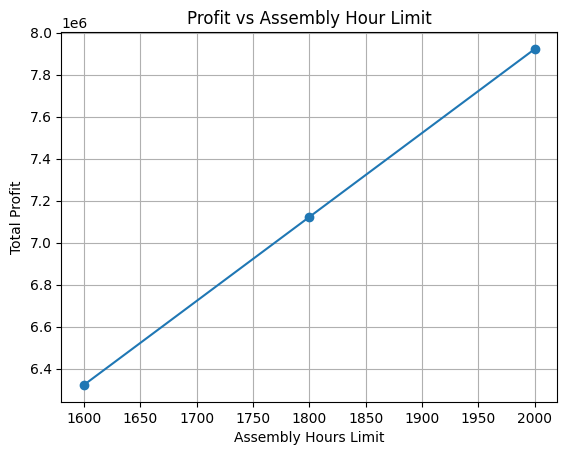

In [ ]:
import pandas as pd
from pulp import *
import matplotlib.pyplot as plt

# Initialize results list
results = []

# Loop through different Assembly hour limits
for assembly_limit in [1600, 1800, 2000]:
    # Define the problem
    prob = LpProblem("Advanced_Production_Problem", LpMaximize)

    # Decision variables
    A = LpVariable("A", lowBound=0, cat=LpInteger)
    B = LpVariable("B", lowBound=0)
    C = LpVariable("C", lowBound=0)

    # Objective function
    prob += 500*A + 400*B + 300*C

    # Constraints
    prob += 0.3*A + 0.1*B + 0.1*C <= assembly_limit, "Assembly_Hours"
    prob += 0.1*A + 0.08*B + 0.04*C <= 2000, "Quality_Control_Hours"
    prob += 0.06*A + 0.04*B + 0.05*C <= 2000, "Packaging_Hours"
    prob += A >= 100, "Min_Demand_A"
    prob += B >= 50,  "Min_Demand_B"
    prob += C >= 80,  "Min_Demand_C"

    # Solve
    prob.solve(PULP_CBC_CMD(msg=0))

    # Record results
    results.append({
        "Assembly Limit": assembly_limit,
        "A": A.varValue,
        "B": B.varValue,
        "C": C.varValue,
        "Total Profit": value(prob.objective)
    })

# Convert results to DataFrame
df = pd.DataFrame(results)
print(df)

for name, constraint in prob.constraints.items():
    if constraint.slack is not None and abs(constraint.slack) < 1e-5:  # Check if slack is not None before using abs()
        print(f"Binding: {name}")

plt.plot(df["Assembly Limit"], df["Total Profit"], marker='o')
plt.xlabel("Assembly Hours Limit")
plt.ylabel("Total Profit")
plt.title("Profit vs Assembly Hour Limit")
plt.grid(True)
plt.show()

### EXPLANATION

This exercise analyzes how changing the **available Assembly Hours** affects the **total profit** of a production model. This process is called **sensitivity analysis**.

- We use a loop to test three different values for the "Assembly_Hours" constraint: 1600, 1800, and 2000 hours.
- For each case, we:
  - Rebuild the optimization model using **PuLP**.
  - Define production variables `A`, `B`, `C` and maximize profit using a linear objective function.
  - Add constraints for:
    - Assembly, Quality Control, and Packaging hours.
    - Minimum production levels for each product.
- The model is solved with the `PULP_CBC_CMD` solver.
- After solving, results for each assembly limit (including values for A, B, C, and profit) are saved into a table using **pandas**.

#### Final Output:
- The table `df` displays how production decisions and profits change depending on assembly capacity.
- The **plot** visualizes the relationship between **Assembly Limit** and **Total Profit**, helping us understand:
  - How much profit increases when more assembly time is available.
  - Whether there are **diminishing returns** after a certain point.

#### Additional Insight:
- Binding constraints are printed at the end for the last model solved. If `Assembly_Hours` is binding, it means it's a **limiting factor** on profit.
- This is helpful for managers to **prioritize expanding capacity** in the most restrictive areas.

> Sensitivity analysis like this is essential for **strategic planning** and **resource allocation** in operations management.


## Exercise 3 (Optional): Binary Decision Constraints

- Add a binary variable that indicates whether you open a specific production line (1) or not (0).
- If that line is closed, the hours available might be reduced or zero.
- Solve and see how the solver decides the best strategy (to open or not to open).

# Bonus:
 - Add sliders to show the values of the variables and the constraints.

In [7]:
import ipywidgets as widgets
from IPython.display import display, Javascript
from pulp import *

# Optimization Solver Function
def solve_optimization(profit_A_value, profit_B_value, profit_C_value):
    # Create the optimization problem (maximize profit)
    prob = LpProblem("Advanced_Production_Problem", LpMaximize)

    # Decision Variables
    A = LpVariable("A", lowBound=0, cat=LpInteger)
    B = LpVariable("B", lowBound=0)
    C = LpVariable("C", lowBound=0)
    assembly_open = LpVariable("Assembly_Open", cat=LpBinary)

    # Profit values
    profit_A = profit_A_value
    profit_B = profit_B_value
    profit_C = profit_C_value

    # Objective Function
    prob += profit_A*A + profit_B*B + profit_C*C, "Profit_Objective"

    # Constraints
    prob += 0.3*A + 0.1*B + 0.1*C <= 1800 * assembly_open, "Assembly_Hours"
    prob += 0.1*A + 0.08*B + 0.04*C <= 800, "Quality_Control_Hours"
    prob += 0.06*A + 0.04*B + 0.05*C <= 700, "Packaging_Hours"

    # Minimum Demand Constraints (can be 0+)
    prob += A >= 0, "Min_Demand_A"
    prob += B >= 0, "Min_Demand_B"
    prob += C >= 0, "Min_Demand_C"

    # Solve the problem
    prob.solve(PULP_CBC_CMD(msg=False))

    # Return results
    return {
        "status": LpStatus[prob.status],
        "A": A.varValue,
        "B": B.varValue,
        "C": C.varValue,
        "assembly_open": assembly_open.varValue,
        "total_profit": value(prob.objective)
    }

# Sliders for inputs
profit_A_slider = widgets.FloatSlider(value=400, min=0, max=800, step=10, description='Profit A', continuous_update=False)
profit_B_slider = widgets.FloatSlider(value=300, min=0, max=600, step=10, description='Profit B', continuous_update=False)
profit_C_slider = widgets.FloatSlider(value=200, min=0, max=400, step=10, description='Profit C', continuous_update=False)

output = widgets.Output()

def update_results(change):
    with output:
        output.clear_output()
        results = solve_optimization(profit_A_slider.value, profit_B_slider.value, profit_C_slider.value)
        print(f"Status: {results['status']}")
        print(f"A = {results['A']}")
        print(f"B = {results['B']}")
        print(f"C = {results['C']}")
        print(f"Assembly line OPEN = {bool(results['assembly_open'])}")
        print(f"Total profit = {results['total_profit']}")

# Observe slider changes
profit_A_slider.observe(update_results, names='value')
profit_B_slider.observe(update_results, names='value')
profit_C_slider.observe(update_results, names='value')

# Display UI
display(profit_A_slider, profit_B_slider, profit_C_slider, output)

# Initial output
update_results(None)

# Patch notebook metadata to prevent GitHub rendering issues
display(Javascript("""
(() => {
    const metadata = Jupyter.notebook.metadata;
    if (!metadata.widgets) metadata.widgets = {};
    if (!metadata.widgets['application/vnd.jupyter.widget-state+json']) {
        metadata.widgets['application/vnd.jupyter.widget-state+json'] = {
            state: {},
            version_major: 2,
            version_minor: 0
        };
    } else {
        const widget_meta = metadata.widgets['application/vnd.jupyter.widget-state+json'];
        if (!widget_meta.state) widget_meta.state = {};
        if (!widget_meta.version_major) widget_meta.version_major = 2;
        if (!widget_meta.version_minor) widget_meta.version_minor = 0;
    }
    console.log("Widget metadata patched successfully.");
})();
"""))


FloatSlider(value=400.0, continuous_update=False, description='Profit A', max=800.0, step=10.0)

FloatSlider(value=300.0, continuous_update=False, description='Profit B', max=600.0, step=10.0)

FloatSlider(value=200.0, continuous_update=False, description='Profit C', max=400.0, step=10.0)

Output()

<IPython.core.display.Javascript object>

### EXPLANATION

In this exercise, We created an interactive linear programming model using `ipywidgets` sliders. The purpose of this setup is to explore how different profit values for products A, B, and C affect the optimal production quantities and whether the assembly line should be opened or not.

#### Decision Variables:
- **A** – Integer variable representing the number of units of product A (e.g., beds).
- **B** – Continuous variable representing product B (e.g., meters of high-quality plywood).
- **C** – Continuous variable representing product C (e.g., meters of low-quality plywood).
- **Assembly_Open** – Binary variable (1 if the assembly line is activated, 0 if not).

#### Objective Function:
The model maximizes total profit, which depends on the adjustable values from the sliders:

Total Profit = profit_A * A + profit_B * B + profit_C * C


#### Constraints:
- **Assembly Time**: Limited to 1800 hours *only if* the assembly line is active (i.e., Assembly_Open = 1). This is modeled as:

0.3A + 0.1B + 0.1*C ≤ 1800 * Assembly_Open

- **Quality Control Time**: Capped at 800 hours.
- **Packaging Time**: Capped at 700 hours.
- **Minimum Demand**: All variables must be greater than or equal to zero. There are no strict lower bounds in this version, allowing the optimizer to decide optimal production levels based on profits.

#### Interactive Sliders:
- `Profit A`: ranges from 0 to 800
- `Profit B`: ranges from 0 to 600
- `Profit C`: ranges from 0 to 400

Each time the user moves a slider, the model recalculates the solution using the updated profit values. The output shows:
- Status of the solver (Optimal/Feasible/etc.)
- Optimal values of A, B, and C
- Whether the assembly line is used (`Assembly_Open = 1` or `0`)
- Total profit from the production plan

#### Purpose:
This simulation helps explore different profit scenarios and decide whether or not using the assembly line is financially justified. When profit margins are low, the optimizer might choose not to produce anything and keep the assembly line closed. When profits are high, it finds the best combination of A, B, and C to maximize income while respecting all resource limits.

This kind of model is useful for real-world decision-making where facility usage comes with a cost or where certain production processes can be optionally enabled or disabled based on profitability.


